# Test Dataloader in dataset.py

In [1]:
# install packages
import yaml
import os
import json
import torch
from torch.utils.data import Dataset
from torch import randint
from torchmetrics.functional.segmentation import mean_iou
from torchvision.transforms import Compose, Resize, ToTensor
from PIL import Image
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask
from pycocotools.coco import COCO
import numpy as np
from sharkbody_seg.dataset import SharkBody



Import Data/Annotations

In [2]:
config_file_path = '/home/Alexandra/Projects/bodycondition/sharkbody_seg/runs/unet_smp/crop_altitude/config/config.yaml' # config file path
with open(config_file_path, 'r') as file: cfg = yaml.safe_load(file) # load yaml as cfg

Functions from earth_obs_seg (Bjorn)

# Test each function

In [3]:
# instantiate shark body
dataset = SharkBody(cfg, split='val')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [6]:
# test data loader
for i in range(100):
    print(dataset[i])  # Should print (image_tensor, label)

13.8
13.8
13.8
12.8
17.3
15.5
14.0
11.7
11.6
11.6
13.6
13.5
13.6
12.0
15.4
13.3
12.4
12.4
30.6
30.6
30.5
30.5
31.1
49.2
39.6
31.4
31.2
31.2
31.2
31.2
29.9
30.6
31.0
32.8
32.6
32.6
29.7
29.4
29.3
29.2
29.4
30.3
30.4
30.4
30.3
25.2
25.4
22.1
22.3
22.0
31.9
31.8
31.8
31.8
27.3
20.3
33.4
33.3
33.2
33.3
28.9
28.9
29.0
15.6
15.6
15.6
15.7
31.9
32.0
31.9
32.0
31.9
31.9
40.2
32.3
11.9
13.9
31.0
30.9
30.8
41.5
42.4
53.6
53.8
44.0
33.1
32.5
33.4
34.5
36.1
38.5
38.5
22.7
22.7
22.8
36.3
32.4
31.9
38.3
39.3


In [5]:
# test len function
print(len(dataset)) 

172


In [5]:
# test the __getitem__ function
sample = dataset[0]
img_tensor = sample['image']  
mask_tensor = sample['mask'] 

sample

{'image': tensor([[[0.3412, 0.3451, 0.3529,  ..., 0.3451, 0.3529, 0.3529],
          [0.3451, 0.3412, 0.3451,  ..., 0.3451, 0.3490, 0.3569],
          [0.3451, 0.3451, 0.3451,  ..., 0.3529, 0.3529, 0.3569],
          ...,
          [0.3216, 0.3176, 0.3137,  ..., 0.3294, 0.3294, 0.3294],
          [0.3176, 0.3137, 0.3176,  ..., 0.3294, 0.3294, 0.3294],
          [0.3176, 0.3176, 0.3176,  ..., 0.3294, 0.3294, 0.3294]],
 
         [[0.5294, 0.5333, 0.5294,  ..., 0.5333, 0.5373, 0.5294],
          [0.5333, 0.5294, 0.5216,  ..., 0.5333, 0.5333, 0.5333],
          [0.5333, 0.5294, 0.5255,  ..., 0.5412, 0.5373, 0.5333],
          ...,
          [0.5176, 0.5137, 0.5098,  ..., 0.5255, 0.5255, 0.5255],
          [0.5137, 0.5098, 0.5137,  ..., 0.5255, 0.5255, 0.5255],
          [0.5137, 0.5137, 0.5137,  ..., 0.5255, 0.5255, 0.5255]],
 
         [[0.4353, 0.4392, 0.4392,  ..., 0.4392, 0.4431, 0.4392],
          [0.4392, 0.4353, 0.4314,  ..., 0.4392, 0.4431, 0.4431],
          [0.4392, 0.4392, 0.43

In [9]:
sample["mask"].dtype

torch.float32

In [4]:
sample = dataset[0]
sample['relative_altitude']

13.8

In [7]:
# check dimensions of tensors

print(f"Image dimensions: {img_tensor.shape if hasattr(img_tensor, 'shape') else img_tensor.size()}") 

# Check the dimensions of the mask
print(f"Mask dimensions: {mask_tensor.shape if hasattr(mask_tensor, 'shape') else mask_tensor.size()}")  


Image dimensions: torch.Size([3, 224, 224])
Mask dimensions: torch.Size([1, 224, 224])


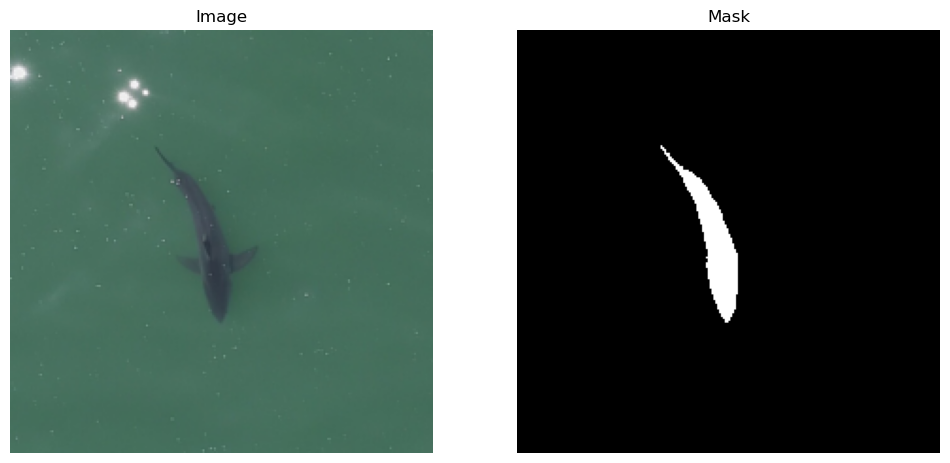

In [18]:
sample = dataset[9]
img_tensor = sample['image']  
mask_tensor = sample['mask'] 

# check plots 
img_display = img_tensor.numpy().transpose(1, 2, 0)  # Convert to (H, W, C)
mask_display = mask_tensor.squeeze(0).numpy()  # Convert from (1, H, W) to (H, W)

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # two subplots

# image plot
axes[0].imshow(img_display)
axes[0].set_title("Image")
axes[0].axis('off') 

# mask plot
axes[1].imshow(mask_display, cmap='gray')  # Use 'gray' colormap for mask
axes[1].set_title("Mask")
axes[1].axis('off') 

plt.show()
